<a href="https://colab.research.google.com/github/shariq101/Approaching-Convolution-Neural-Network/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving RESULT.csv to RESULT.csv


In [5]:
train = pd.read_csv('/content/train.tsv',sep = '\t')
test = pd.read_csv('/content/test.tsv',sep = '\t')

In [6]:
class_count = train['Sentiment'].value_counts()
class_count

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of reviews ')

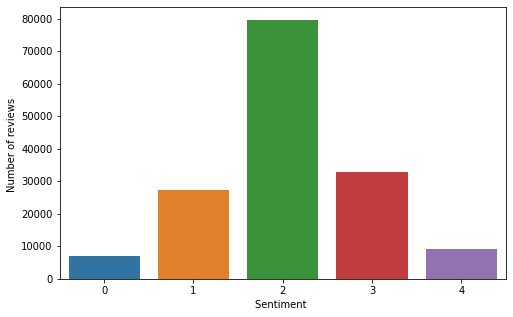

In [7]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [8]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(train, train['Sentiment'])

In [9]:
class_count_over = X_over['Sentiment'].value_counts()
class_count_over

1    79582
2    79582
3    79582
4    79582
0    79582
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of reviews ')

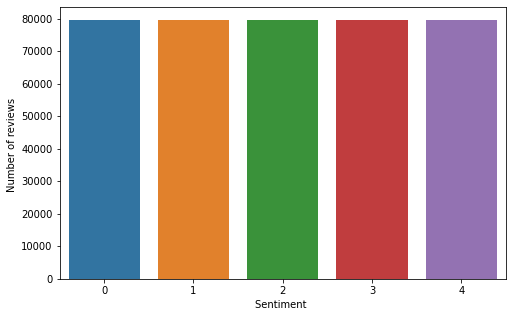

In [10]:
x = np.array(class_count_over.index)
y = np.array(class_count_over.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [11]:
print('Number of sentences in training set:',len(train['SentenceId'].unique()))
print('Number of sentences in test set:',len(test['SentenceId'].unique()))
print('Average words per sentence in train:',train.groupby('SentenceId')['Phrase'].count().mean())
print('Average words per sentence in test:',test.groupby('SentenceId')['Phrase'].count().mean())

Number of sentences in training set: 8529
Number of sentences in test set: 3310
Average words per sentence in train: 18.297572986282095
Average words per sentence in test: 20.027794561933536


In [12]:
from keras.utils import to_categorical
target=X_over.Sentiment.values
y=to_categorical(target)
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
max_features = 13000
max_words = 50
batch_size = 128
epochs = 10
num_classes=5

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(X_over['Phrase'],y,test_size = 0.20)

In [15]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.7 MB/s eta 0:00:00


In [16]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [17]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [18]:
X_test = tokenizer.texts_to_sequences(test['Phrase'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [19]:
X_test

array([[   0,    0,    0, ...,  776,  919,  494],
       [   0,    0,    0, ...,  776,  919,  494],
       [   0,    0,    0, ...,    0,    0,   16],
       ...,
       [   0,    0,    0, ...,    2,  119, 7764],
       [   0,    0,    0, ...,    2,  119, 7764],
       [   0,    0,    0, ...,    0,  347, 1955]], dtype=int32)

In [20]:
len(X_test)

66292

In [21]:
X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)

In [22]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(318328, 50) (318328, 5)
(79582, 50) (79582, 5)


In [25]:
from tensorflow import keras
model3_LSTM=Sequential()
model3_LSTM.add(Embedding(max_features,100,mask_zero=True))
model3_LSTM.add(SpatialDropout1D(0.2))
model3_LSTM.add(LSTM(64,dropout=0.4,return_sequences=False,recurrent_dropout=0.2))
model3_LSTM.add(Dense(5,activation='sigmoid'))
model3_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
model3_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1300000   
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 1,342,565
Trainable params: 1,342,565
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
%%time
history3=model3_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
2487/2487 [==============================] - 607s 242ms/step - loss: 0.9205 - accuracy: 0.6200 - val_loss: 0.7514 - val_accuracy: 0.6980
Epoch 2/10
2487/2487 [==============================] - 584s 235ms/step - loss: 0.7091 - accuracy: 0.7134 - val_loss: 0.6751 - val_accuracy: 0.7296
Epoch 3/10
2487/2487 [==============================] - 567s 228ms/step - loss: 0.6391 - accuracy: 0.7435 - val_loss: 0.6280 - val_accuracy: 0.7500
Epoch 4/10
2487/2487 [==============================] - 584s 235ms/step - loss: 0.5917 - accuracy: 0.7630 - val_loss: 0.5925 - val_accuracy: 0.7645
Epoch 5/10
2487/2487 [==============================] - 590s 237ms/step - loss: 0.5574 - accuracy: 0.7769 - val_loss: 0.5668 - val_accuracy: 0.7790
Epoch 6/10
2487/2487 [==============================] - 557s 224ms/step - loss: 0.5296 - accuracy: 0.7898 - val_loss: 0.5545 - val_accuracy: 0.7859
Epoch 7/10
2487/2487 [==============================] - 557s 224ms/step - loss: 0.5060 - accuracy: 0.7995 - val_

In [27]:
res = pd.read_csv('/content/RESULT.csv' , sep = ',')

In [28]:
y_pred3=np.argmax(model3_LSTM.predict(X_test), axis=-1)
res.Sentiment=y_pred3
res.to_csv('sub3_LSTM.csv',index=False)
res.head()

2072/2072 [==============================] - 37s 17ms/step


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,1


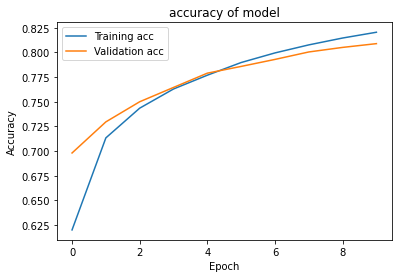

In [29]:
plt.plot(history3.history['accuracy'], label="Training acc")
plt.plot(history3.history['val_accuracy'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

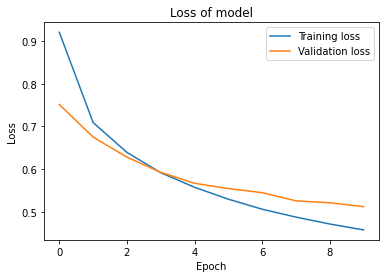

In [30]:
plt.plot(history3.history['loss'], label="Training loss")
plt.plot(history3.history['val_loss'], label ="Validation loss")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [31]:
from tensorflow import keras
model4_LSTM=Sequential()
model4_LSTM.add(Embedding(max_features,100,mask_zero=True))
model4_LSTM.add(LSTM(64,dropout=0.4,return_sequences=False,recurrent_dropout=0.2))
model4_LSTM.add(Dense(5,activation='sigmoid'))
model4_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
model4_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1300000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,342,565
Trainable params: 1,342,565
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
%%time
history4=model4_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
2487/2487 [==============================] - 593s 237ms/step - loss: 0.8970 - accuracy: 0.6311 - val_loss: 0.7371 - val_accuracy: 0.7024
Epoch 2/10
2487/2487 [==============================] - 553s 222ms/step - loss: 0.6837 - accuracy: 0.7249 - val_loss: 0.6546 - val_accuracy: 0.7359
Epoch 3/10
2487/2487 [==============================] - 548s 220ms/step - loss: 0.6083 - accuracy: 0.7564 - val_loss: 0.6068 - val_accuracy: 0.7598
Epoch 4/10
2487/2487 [==============================] - 548s 220ms/step - loss: 0.5583 - accuracy: 0.7758 - val_loss: 0.5707 - val_accuracy: 0.7764
Epoch 5/10
2487/2487 [==============================] - 546s 220ms/step - loss: 0.5208 - accuracy: 0.7932 - val_loss: 0.5506 - val_accuracy: 0.7868
Epoch 6/10
2487/2487 [==============================] - 549s 221ms/step - loss: 0.4882 - accuracy: 0.8071 - val_loss: 0.5293 - val_accuracy: 0.7983
Epoch 7/10
2487/2487 [==============================] - 551s 222ms/step - loss: 0.4645 - accuracy: 0.8174 - val_

In [33]:
res = pd.read_csv('/content/RESULT.csv' , sep = ',')

In [34]:
y_pred4=np.argmax(model4_LSTM.predict(X_test), axis=-1)
res.Sentiment=y_pred4
res.to_csv('sub4_LSTM.csv',index=False)
res.head()

2072/2072 [==============================] - 36s 17ms/step


,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


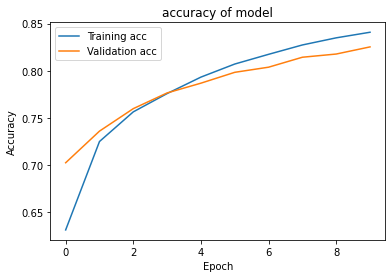

In [35]:
plt.plot(history4.history['accuracy'], label="Training acc")
plt.plot(history4.history['val_accuracy'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

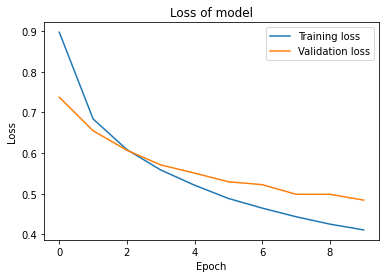

In [36]:
plt.plot(history4.history['loss'], label="Training loss")
plt.plot(history4.history['val_loss'], label ="Validation loss")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [37]:
from tensorflow import keras
model5_LSTM=Sequential()
model5_LSTM.add(Embedding(max_features,100,mask_zero=True))
model5_LSTM.add(LSTM(64,dropout=0.4,return_sequences=True,recurrent_dropout=0.2))
model5_LSTM.add(LSTM(32,dropout=0.5,return_sequences=False,recurrent_dropout=0.2))
model5_LSTM.add(Dense(5,activation='sigmoid'))
model5_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
model5_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         1300000   
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          42240     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,354,821
Trainable params: 1,354,821
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [38]:
%%time
history5=model5_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
2487/2487 [==============================] - 872s 348ms/step - loss: 0.9203 - accuracy: 0.6207 - val_loss: 0.7493 - val_accuracy: 0.7002
Epoch 2/10
2487/2487 [==============================] - 876s 352ms/step - loss: 0.7116 - accuracy: 0.7148 - val_loss: 0.6721 - val_accuracy: 0.7332
Epoch 3/10
2487/2487 [==============================] - 888s 357ms/step - loss: 0.6406 - accuracy: 0.7440 - val_loss: 0.6294 - val_accuracy: 0.7504
Epoch 4/10
2487/2487 [==============================] - 878s 353ms/step - loss: 0.5974 - accuracy: 0.7619 - val_loss: 0.6019 - val_accuracy: 0.7637
Epoch 5/10
2487/2487 [==============================] - 942s 379ms/step - loss: 0.5650 - accuracy: 0.7750 - val_loss: 0.5762 - val_accuracy: 0.7734
Epoch 6/10
2487/2487 [==============================] - 862s 347ms/step - loss: 0.5418 - accuracy: 0.7840 - val_loss: 0.5645 - val_accuracy: 0.7795
Epoch 7/10
2487/2487 [==============================] - 868s 349ms/step - loss: 0.5217 - accuracy: 0.7932 - val_

In [39]:
y_pred5=np.argmax(model5_LSTM.predict(X_test), axis=-1)
res.Sentiment=y_pred5
res.to_csv('sub5_LSTM.csv',index=False)
res.head()

2072/2072 [==============================] - 60s 29ms/step


,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3


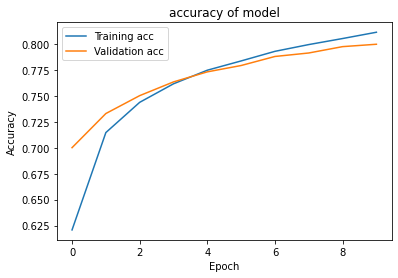

In [40]:
plt.plot(history5.history['accuracy'], label="Training acc")
plt.plot(history5.history['val_accuracy'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

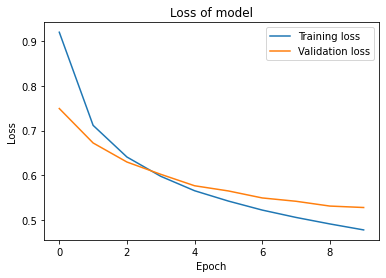

In [41]:
plt.plot(history5.history['loss'], label="Training loss")
plt.plot(history5.history['val_loss'], label ="Validation loss")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [42]:
model6_CNNLSTM= Sequential()
model6_CNNLSTM.add(Embedding(max_features,100,input_length=max_words))
model6_CNNLSTM.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model6_CNNLSTM.add(MaxPooling1D(pool_size=2))
model6_CNNLSTM.add(Dropout(0.25))
model6_CNNLSTM.add(LSTM(64,dropout=0.4,return_sequences=False,recurrent_dropout=0.2))
model6_CNNLSTM.add(Dense(5,activation='sigmoid'))
model6_CNNLSTM.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
model6_CNNLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           1300000   
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

history6=model6_CNNLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=10, batch_size=batch_size, verbose=1,callbacks = [early_stop])

Epoch 1/10
   2/2487 [..............................] - ETA: 5:51 - loss: 1.6089 - accuracy: 0.2461   